<a href="https://colab.research.google.com/github/congltk1234/Fashion_Items_Classification/blob/main/HM/KNN_euclidean_distance_HMclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://drive.google.com/file/d/1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8/view?usp=sharing
!gdown 1vdh_ICQD1QBwOYkFMMrea_6kO4GYLDR8
!unzip "HM_items_classification.zip" -d "/content/HM_items_classification"

Streaming output truncated to the last 5000 lines.
  inflating: /content/HM_items_classification/test/bag/0553055001.jpg  
  inflating: /content/HM_items_classification/test/bag/0553317001.jpg  
  inflating: /content/HM_items_classification/test/bag/0560783021.jpg  
  inflating: /content/HM_items_classification/test/bag/0566564002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569244002.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246008.jpg  
  inflating: /content/HM_items_classification/test/bag/0569246011.jpg  
  inflating: /content/HM_items_classification/test/bag/0575923001.jpg  
  inflating: /content/HM_items_classification/test/bag/0592272001.jpg  
  inflating: /content/HM_items_classification/test/bag/0596006003.jpg  
  inflating: /content/HM_items_classification/test/bag/0599832002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601282002.jpg  
  inflating: /content/HM_items_classification/test/bag/0601730002.jpg  
  inflating: 

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import os


import cv2
class SimplePreprocessor:
    def __init__(self, width, height, inter=cv2.INTER_AREA):
        self.width = width
        self.height = height
        self.inter = inter

    def preprocess(self, image):
        return cv2.resize(image, (self.width, self.height), interpolation=self.inter)


import numpy as np
import cv2
import os
class SimpleDatasetLoader:
    def __init__(self, preprocessors=None):
        self.preprocessors = preprocessors
        if self.preprocessors is None:
            self.preprocessors = []

    def load(self, imagePaths, verbose=-1):
        data = []
        labels = []

        for (i, imagePath) in enumerate(imagePaths):
            if True:
                image = cv2.imread(imagePath)
                label = imagePath.split('/')[-2]

                if image is None:
                    continue

                if self.preprocessors is not None:
                    for p in self.preprocessors:
                        image = p.preprocess(image)
                    data.append(image)
                    labels.append(label)
            if verbose > 0 and i > 0 and (i + 1) % verbose == 0:
                print("[INFO] processed {}/{}".format(i + 1,len(imagePaths)))

        return (np.array(data), np.array(labels))

In [3]:
# import necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import os
import glob
import cv2
import numpy as np
import tqdm
def getListOfFiles(dirName):
    # create a list of file and sub directories
    # names in the given directory
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in tqdm.tqdm(listOfFile):
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)

    return allFiles




In [4]:
# @title Load Train data
dir = '/content/HM_items_classification/train'

imagePaths = getListOfFiles(dir) ## Folder structure: datasets --> sub-folders with labels name

sp = SimplePreprocessor(227, 227)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(x_train, y_train) = sdl.load(imagePaths, verbose=500)
x_train = x_train.reshape(x_train.shape[0], -1)
print(x_train.shape)
print(y_train.shape)
print("[INFO] features matrix: {:.1f}MB".format(x_train.nbytes / (1024 * 1024.0)))

100%|██████████| 538/538 [00:00<00:00, 53267.92it/s]

100%|██████████| 292/292 [00:00<00:00, 101654.78it/s]

100%|██████████| 561/561 [00:00<00:00, 109543.97it/s]

100%|██████████| 294/294 [00:00<00:00, 108397.10it/s]

100%|██████████| 267/267 [00:00<00:00, 112336.16it/s]

100%|██████████| 385/385 [00:00<00:00, 114802.15it/s]

100%|██████████| 509/509 [00:00<00:00, 112933.81it/s]

100%|██████████| 302/302 [00:00<00:00, 102465.60it/s]

100%|██████████| 10/10 [00:00<00:00, 57.83it/s]


[INFO] processed 500/4000
[INFO] processed 1000/4000
[INFO] processed 1500/4000
[INFO] processed 2000/4000
[INFO] processed 2500/4000
[INFO] processed 3000/4000
[INFO] processed 3500/4000
[INFO] processed 4000/4000
(4000, 154587)
(4000,)
[INFO] features matrix: 589.7MB


In [5]:
# @title Load Test data
dir = '/content/HM_items_classification/test'

imagePaths = getListOfFiles(dir) ## Folder structure: datasets --> sub-folders with labels name
sp = SimplePreprocessor(227, 227)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(x_test, y_test) = sdl.load(imagePaths, verbose=500)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_test.shape)
print(y_test.shape)
print("[INFO] features matrix: {:.1f}MB".format(x_test.nbytes / (1024 * 1024.0)))

100%|██████████| 134/134 [00:00<00:00, 107443.46it/s]

100%|██████████| 73/73 [00:00<00:00, 94094.71it/s]

100%|██████████| 139/139 [00:00<00:00, 110690.76it/s]

100%|██████████| 74/74 [00:00<00:00, 89343.26it/s]

100%|██████████| 67/67 [00:00<00:00, 97440.49it/s]

100%|██████████| 109/109 [00:00<00:00, 105730.60it/s]

100%|██████████| 97/97 [00:00<00:00, 104400.18it/s]

100%|██████████| 126/126 [00:00<00:00, 108808.38it/s]

100%|██████████| 76/76 [00:00<00:00, 100779.99it/s]

100%|██████████| 10/10 [00:00<00:00, 136.68it/s]


[INFO] processed 500/1000
[INFO] processed 1000/1000
(1000, 154587)
(1000,)
[INFO] features matrix: 147.4MB


100%|██████████| 19/19 [15:40<00:00, 49.51s/it]


<Figure size 640x480 with 0 Axes>

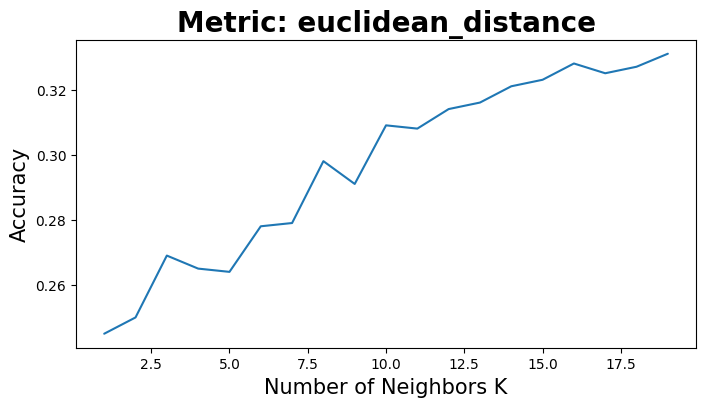

The optimal number of neighbors is 19.


<Figure size 1000x300 with 0 Axes>

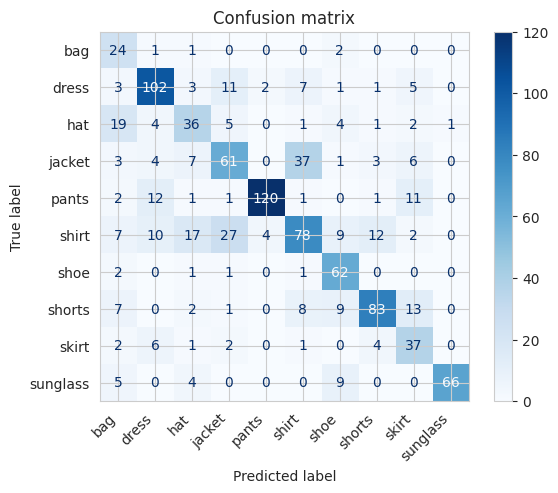

              precision    recall  f1-score   support

         bag       0.86      0.32      0.47        74
       dress       0.76      0.73      0.74       139
         hat       0.49      0.49      0.49        73
      jacket       0.50      0.56      0.53       109
       pants       0.81      0.95      0.87       126
       shirt       0.47      0.58      0.52       134
        shoe       0.93      0.64      0.76        97
      shorts       0.67      0.79      0.73       105
       skirt       0.70      0.49      0.57        76
    sunglass       0.79      0.99      0.87        67

    accuracy                           0.67      1000
   macro avg       0.70      0.65      0.66      1000
weighted avg       0.69      0.67      0.66      1000

0.669
0.6634785839217252


In [6]:
# @title euclidean_distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from imutils import paths
import os
import glob
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# creating list of K for KNN
k_list = list(range(1,20,1))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in tqdm.tqdm(k_list):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=1, p=2)
    knn.fit(x_train, y_train)
    cv_scores.append(accuracy_score(y_test, knn.predict(x_test)))

# changing to misclassification error
MSE = [1 - x for x in cv_scores]


plt.figure()
plt.figure(figsize=(8,4))
plt.title('Metric: euclidean_distance', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)
plt.show()

# finding best k
best_k = k_list[MSE.index(max(MSE))]
print("The optimal number of neighbors is %d." % best_k)


model = KNeighborsClassifier(n_neighbors=best_k, n_jobs=1,p=2)
model.fit(x_train, y_train)
predict = model.predict(x_test)

from sklearn.metrics import ConfusionMatrixDisplay
# Plot non-normalized confusion matrix
plt.figure(figsize=(10,3))

disp = ConfusionMatrixDisplay.from_predictions(
    predict, y_test,
    # display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize=None,
)
disp.ax_.set_title("Confusion matrix")

# print(disp.confusion_matrix)
# Rotate x-axis labels
disp.ax_.set_xticklabels(disp.ax_.get_xticklabels(), rotation=45, ha='right')

plt.show()


print(classification_report(y_test,predict))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict))
from sklearn.metrics import f1_score
print(f1_score(y_test, predict, average='weighted'))